# Загрузка Pandas и очистка данных

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import OrdinalEncoder
import ast
import re
from datetime import datetime

In [421]:
df = pd.read_csv('main_task_new.csv')

In [422]:
df[df.Reviews.str.contains('02/26/2018')]

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
1592,id_3048,Lisbon,NaN,3051.0,4.0,NaN,13.0,[['Good range of products to enjoy. Managemen....,/Restaurant_Review-g189158-d8692873-Reviews-Ba...,d8692873
4000,id_215,Lisbon,"['Tibetan', 'Indian', 'Nepali', 'Vegetarian Fr...",216.0,5.0,$,206.0,"[['Fantastic value and even better food', 'Bes...",/Restaurant_Review-g189158-d9871750-Reviews-Ya...,d9871750
5635,id_279,Bratislava,NaN,280.0,4.5,NaN,5.0,"[['Absolutely fantastic. Do not miss it!', 'Me...",/Restaurant_Review-g274924-d13323825-Reviews-T...,d13323825
7866,id_1165,Lisbon,"['Mediterranean', 'Bar', 'Portuguese', 'Vegeta...",1166.0,3.5,$$ - $$$,190.0,"[['Great style but little substance', 'Beautif...",/Restaurant_Review-g189158-d12700473-Reviews-S...,d12700473
8135,id_82,Bratislava,"['Bar', 'Pub', 'Central European', 'European']",83.0,4.0,$,139.0,"[['Interesting Bar', 'Great place to stop by f...",/Restaurant_Review-g274924-d740039-Reviews-KGB...,d740039
10600,id_158,Brussels,"['Belgian', 'Pub', 'European']",159.0,4.5,$,94.0,"[['Cool old tavern.', 'BEST EXPERIENCE !'], ['...",/Restaurant_Review-g188644-d7349890-Reviews-A_...,d7349890
12019,id_2928,Brussels,NaN,2929.0,2.0,NaN,131.0,"[['Not worthy', 'Horrid!'], ['02/26/2018', '01...",/Restaurant_Review-g188644-d1763898-Reviews-Le...,d1763898
15088,id_47,Oporto,"['Mediterranean', 'European', 'Portuguese', 'V...",48.0,4.5,$$ - $$$,347.0,"[['Inspiring and fresh food!', 'So happy we fo...",/Restaurant_Review-g189180-d7243143-Reviews-Br...,d7243143
17447,id_424,Bratislava,['Pizza'],425.0,4.5,NaN,7.0,"[['Good value, good food and service', 'Best p...",/Restaurant_Review-g274924-d4308616-Reviews-Pi...,d4308616
18511,id_20,Lisbon,"['Seafood', 'Mediterranean', 'European', 'Port...",21.0,4.5,$$ - $$$,2253.0,"[['Great', 'High Class Restaurant'], ['02/26/2...",/Restaurant_Review-g189158-d2308921-Reviews-Fr...,d2308921


In [423]:
def rewiew(row):
    res = re.findall("\[(.*?)\]",row)

    r = res[0].split(",")
    d = res[1].split(",")
    return list(zip(r,d))


In [424]:
df.Reviews = df.Reviews.apply(lambda x: rewiew(x))

In [425]:
df = df.explode('Reviews')

In [426]:
df[['Review', 'Review_Date']] = pd.DataFrame(df['Reviews'].tolist(), index=df.index)

In [427]:
df.drop('Reviews', axis=1, inplace=True)

In [428]:
r = re.compile(r'(\d+\/\d+\/\d+)')
df.Review_Date = df.Review_Date.apply(lambda x: r.findall(x)[0] if bool(r.findall(x)) else np.NaN)

In [429]:
df = df[df.Review_Date.notna()]

In [430]:
def strtodate(s):
    try:
        return datetime.strptime(s, '%m/%d/%Y')
    except:
        return np.NaN

In [431]:
df.Review_Date =pd.to_datetime(df['Review_Date'], format='%m/%d/%Y')

In [432]:
df.dtypes

Restaurant_id                object
City                         object
Cuisine Style                object
Ranking                     float64
Rating                      float64
Price Range                  object
Number of Reviews           float64
URL_TA                       object
ID_TA                        object
Review                       object
Review_Date          datetime64[ns]
dtype: object

In [433]:
df.Review_Date.sort_values()

37913   2004-04-21
11140   2007-11-14
37862   2007-11-21
6565    2007-11-23
34413   2007-12-08
           ...    
26781   2018-02-26
25943   2018-02-26
37689   2018-02-26
24797   2018-02-26
22263   2018-02-26
Name: Review_Date, Length: 62501, dtype: datetime64[ns]

In [223]:
df.isna().any()

Restaurant_id        False
City                 False
Cuisine Style         True
Ranking              False
Rating               False
Price Range           True
Number of Reviews     True
Reviews              False
URL_TA               False
ID_TA                False
dtype: bool

In [225]:
df['Cuisine Style'] = df['Cuisine Style'].fillna("['Vegetarian Friendly']")
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: ast.literal_eval(x))
df = df.explode('Cuisine Style')
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: x.strip())

In [226]:
len(df['Cuisine Style'].unique())

125

In [191]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())

In [192]:
df = df[df['Price Range'].notna()]

In [193]:
df['Price Range'].unique()

array(['$$ - $$$', '$$$$', '$'], dtype=object)

In [194]:
df['Price Range'].replace(['$','$$ - $$$', '$$$$'],
                           [1,2,3], inplace=True)

/tmp/ipykernel_5049/3664601459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Range'].replace(['$','$$ - $$$', '$$$$'],


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9817c82970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98181f3d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9817c82eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f98181f3eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f98181f3ee0>],
 'means': []}

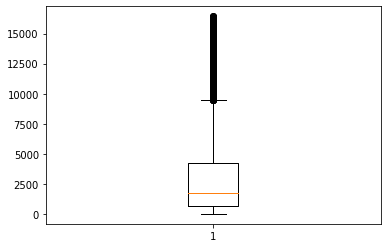

In [195]:

plt.boxplot(df['Ranking'])

In [196]:
encod = OrdinalEncoder()
df['City'] = encod.fit_transform(df[['City']])


/tmp/ipykernel_5049/2878080235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = encod.fit_transform(df[['City']])


In [197]:
len(df['City'].unique())

31

In [198]:
df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: x[1:-1].split(','))

/tmp/ipykernel_5049/1443299056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: x[1:-1].split(','))


In [199]:
np.mean(df['Cuisine Style'].apply(lambda x: len(x)))

3.3733629470781956

In [125]:
df = df.explode('Cuisine Style')

In [126]:
df.drop(['Reviews','URL_TA', 'ID_TA'], axis=1, inplace=True)

In [110]:
df['Cuisine Style'] = encod.fit_transform(df[['Cuisine Style']])

In [128]:
df['Cuisine Style'].value_counts()

 'Vegetarian Friendly'    10812
 'European'                7606
'Italian'                  4879
 'Vegan Options'           4439
 'Gluten Free Options'     4100
                          ...  
 'Salvadoran'                 1
'Tibetan'                     1
'Ethiopian'                   1
'Balti'                       1
 'Latvian'                    1
Name: Cuisine Style, Length: 230, dtype: int64

In [88]:
df[df['Price Range']==2].count()

Restaurant_id        64499
City                 64499
Cuisine Style        64499
Ranking              64499
Rating               64499
Price Range          64499
Number of Reviews    64499
dtype: int64

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [82]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [83]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [84]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [85]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [86]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [87]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.07936180356899601
